In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset
train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
val_data = datagen.flow_from_directory(val_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_data, epochs=5, validation_data=val_data)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 89s 534ms/step - accuracy: 0.7641 - loss: 0.6206 - val_accuracy: 0.8750 - val_loss: 0.2446
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 484ms/step - accuracy: 0.9695 - loss: 0.0862 - val_accuracy: 0.9375 - val_loss: 0.1764
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 80s 488ms/step - accuracy: 0.9775 - loss: 0.0644 - val_accuracy: 0.8750 - val_loss: 0.3835
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 79s 482ms/step - accuracy: 0.9826 - loss: 0.0519 - val_accuracy: 0.8750 - val_loss: 0.1926
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 78s 478ms/step - accuracy: 0.9804 - loss: 0.0472 - val_accuracy: 0.9375 - val_loss: 0.1282


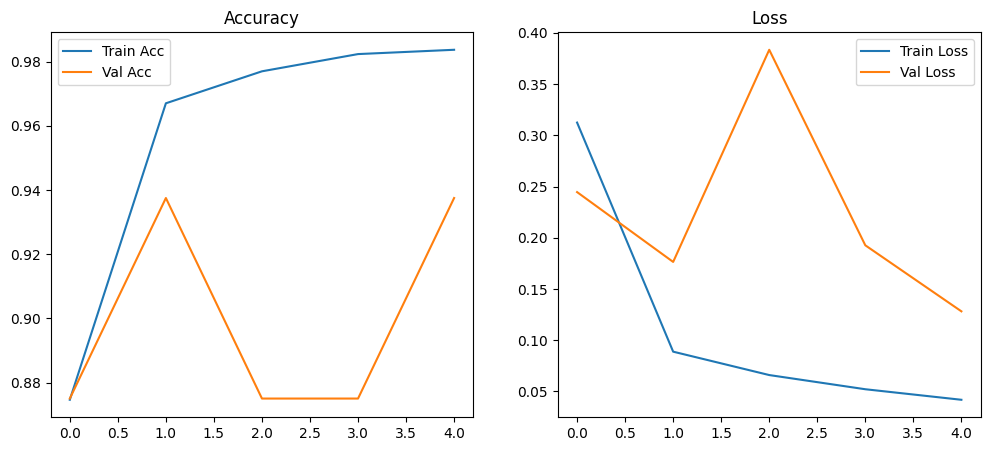

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.44      0.50      0.47         8

    accuracy                           0.44        16
   macro avg       0.44      0.44      0.44        16
weighted avg       0.44      0.44      0.44        16



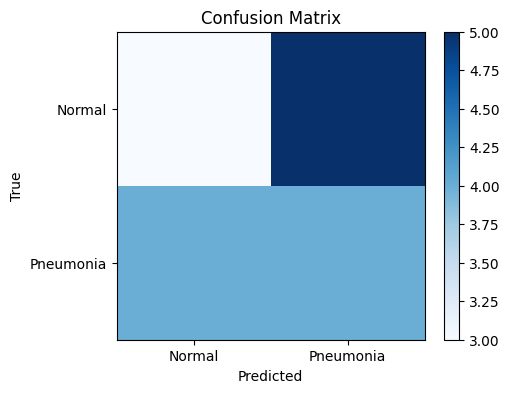

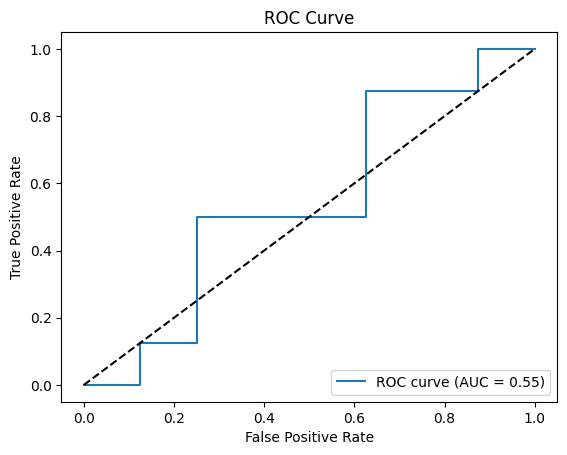

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np

# Step 2: Plot Accuracy and Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()
plt.show()

# Step 3: Evaluate on validation set
val_data.reset()  # Important if you want to use predict()
y_pred_prob = model.predict(val_data)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()
y_true = val_data.classes

# Step 4: Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ['Normal', 'Pneumonia'])
plt.yticks([0,1], ['Normal', 'Pneumonia'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Step 6: ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()